In [1]:
import pandas as pd


In [4]:
df = pd.read_csv('../titanic.csv', usecols=['Age','Fare', 'Survived'])

In [19]:
df.head()
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:3], df.iloc[:,0], test_size=0.2, random_state=42)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Fare', ylabel='Density'>

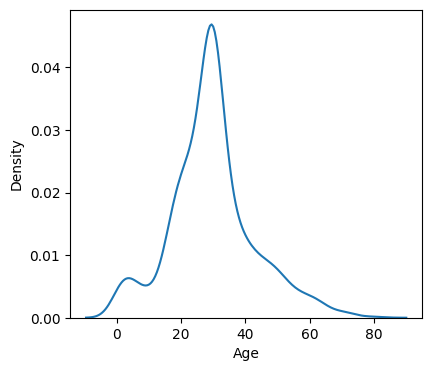

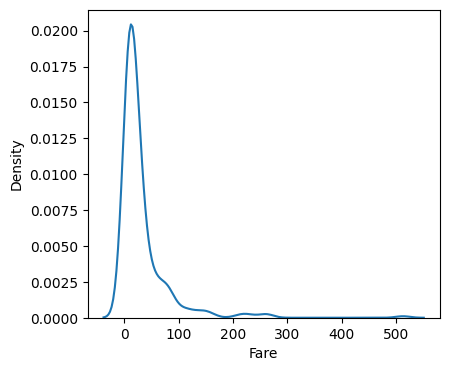

In [35]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.kdeplot(df['Age'])

plt.figure(figsize=(10,4))
plt.subplot(122)
sns.kdeplot(df['Fare'])

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
lr = LogisticRegression()

In [45]:
dtc.fit(x_train, y_train)
lr.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [40]:
from sklearn.metrics import accuracy_score
dtcPred = dtc.predict(x_test)
lrPred = lr.predict(x_test)

print('dtc = ', accuracy_score(dtcPred, y_test))
print('lr = ', accuracy_score(lrPred, y_test))

dtc =  0.6536312849162011
lr =  0.6480446927374302


In [43]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
fr = FunctionTransformer(func=np.log1p)

In [44]:
x_train_transformed = fr.fit_transform(x_train)
x_test_transformed = fr.fit_transform(x_test)

In [46]:
dtc.fit(x_train_transformed, y_train)
lr.fit(x_train_transformed, y_train)

dtcPred = dtc.predict(x_test)
lrPred = lr.predict(x_test)

print('dtc = ', accuracy_score(dtcPred, y_test))
print('lr = ', accuracy_score(lrPred, y_test))

dtc =  0.5921787709497207
lr =  0.7374301675977654


<Axes: xlabel='Fare', ylabel='Density'>

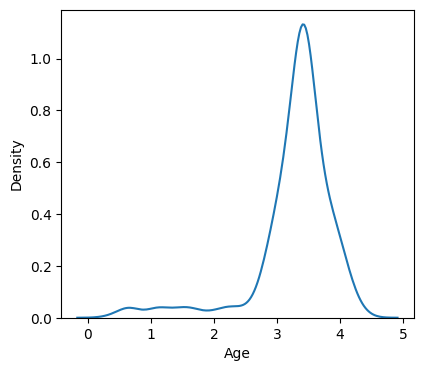

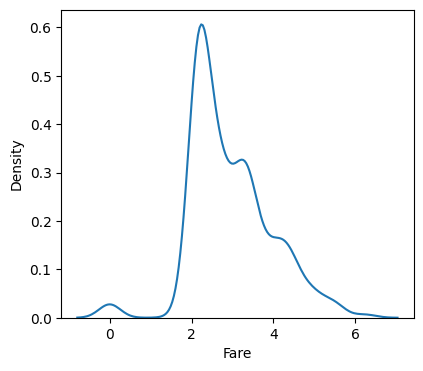

In [48]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.kdeplot(x_train_transformed['Age'])

plt.figure(figsize=(10,4))
plt.subplot(122)
sns.kdeplot(x_train_transformed['Fare'])

In [49]:
import scipy.stats as stats

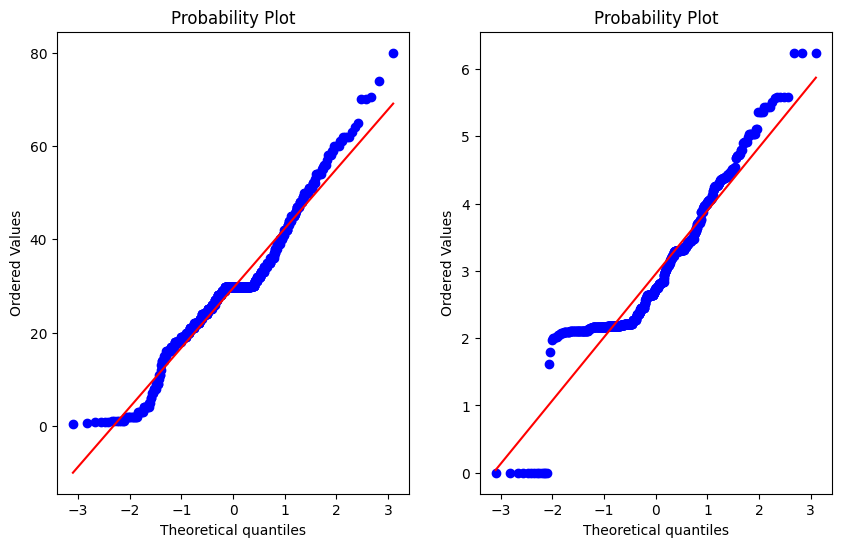

In [61]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('before')
stats.probplot(x_train['Age'], dist='norm', plot=plt)

plt.subplot(122)
plt.title('after')
stats.probplot(x_train_transformed['Fare'], dist='norm', plot=plt)
plt.show()